# ZOMATO RESTAURANTS BANGALORE ANALYSIS AND PREDICTION

Dataset - zomato.csv <br>
1. Rows - 51717 <br>
2. Columns - 17 <br>
3. Categorical Variables -  14 <br> 
4. Numerical Variables -  3<br>  
5. %of missing data - 4.28%

# Importing required libraries and dataset

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import sklearn as sk
import seaborn as sns
from google.colab import drive
import warnings
warnings.filterwarnings('ignore')

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
#loading dataframe
dataframe =pd.read_csv('/content/gdrive/My Drive/zomato.csv')
df = dataframe.copy()
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


# Data extrapolation

### Column  description
* url : zomato url for the restaurants

* address : complete location of the restaurant

* name : name of the restaurant

* online_order : whether restaurant accepts online order

* book_table : whether restaurant provides option for booking table

* rating : restaurants rating on zomato website

* votes : number of individual who voted for restaurants

* phone : contact details of the restaurant

* localtion : area where restaurant is situated

* rest_type : Type of restaurants (Categorical value)

* dish_liked : what are all dishes of the restaurant that people liked

* cuisines : cuisines offered by the restaurant

* approx_cost(for two people) : average cost for two people
* review_list : reviews of the restaurant on zomato website
* menu_item : menu items available in the restuarant
* listed_in(type) : type of the restaurant
* listed_in(city) : locality of the restaurant position

In [4]:
#Characteristics of the dataset
print("Rows x Columns:")
print(df.shape)
print("\n")
print("Various attributes:")
for i in range(17):
    print(i+1,df.columns[i])

Rows x Columns:
(51717, 17)


Various attributes:
1 url
2 address
3 name
4 online_order
5 book_table
6 rate
7 votes
8 phone
9 location
10 rest_type
11 dish_liked
12 cuisines
13 approx_cost(for two people)
14 reviews_list
15 menu_item
16 listed_in(type)
17 listed_in(city)


In [5]:
print("Number of null in each colums")
df.isnull().sum()

Number of null in each colums


url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [6]:
totalnull = df.isnull().sum().sum()
print(totalnull)
percent_null = ((totalnull)/(51717*17))*100
print("Percentage of null values:",percent_null)

37700
Percentage of null values: 4.288042730288937


# Data cleaning

In [7]:

df.rename(columns={'approx_cost(for two people)':'approx_cost','listed_in(type)':'listed_type'},inplace = True)
df.drop(columns = ['location','address','url','phone','menu_item','reviews_list'],inplace = True)
df.rename(columns = {'listed_in(city)':'location'},inplace=True)
df.head()
# i think its best if we remove menu_item and dish_liked

,name,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_cost,listed_type,location
0,Jalsa,Yes,Yes,4.1/5,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


In [8]:
# cleaning field-rating
df.rename(columns = {'rate':'rating'},inplace = True)
df['rating'] = df['rating'].replace('[ ]', '',regex = True)
df['rating'] = df['rating'].replace('',np.NaN)
df['rating'] = df['rating'].replace('-',np.NaN)
df['rating'] = df['rating'].replace('NEW',np.NaN)

In [9]:
df['rating'] = df.loc[: ,'rating'].astype(str)
df['rating'] =df['rating'].apply(lambda x:x.replace('/5','') ).apply(lambda x:float(x))

In [10]:
# removing "," and converting it into float value
df['approx_cost']=df['approx_cost'].astype(str).apply(lambda x:x.replace(',',''))
df.isnull().sum()

name                0
online_order        0
book_table          0
rating          10052
votes               0
rest_type         227
dish_liked      28078
cuisines           45
approx_cost         0
listed_type         0
location            0
dtype: int64

In [11]:
# restaraunt names has typos such as CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© , correcting that
df['name'] = df['name'].astype(str).apply(lambda x:x.replace('Ã','')).apply(lambda x:x.replace('Â','')).apply(lambda x:x.replace("\\",'')).apply(lambda x:x.replace("Â",'')).apply(lambda x:x.replace("©",''))

df.isnull().sum()

name                0
online_order        0
book_table          0
rating          10052
votes               0
rest_type         227
dish_liked      28078
cuisines           45
approx_cost         0
listed_type         0
location            0
dtype: int64

In [12]:
#Handling the empty or missing values
df['rest_type']=df['rest_type'].fillna(df['rest_type'].mode()[0])
df['cuisines']=df['cuisines'].fillna(df['cuisines'].mode()[0])

In [13]:
print('Missing values in "location"  column: ',df['location'].isna().sum())
print('Missing values in "rest_type" column: ',df['rest_type'].isna().sum())
print('Missing values in "cuisines"  column: ',df['cuisines'].isna().sum())

Missing values in "location"  column:  0
Missing values in "rest_type" column:  0
Missing values in "cuisines"  column:  0


In [14]:
df['approx_cost']=df['approx_cost'].astype(str).apply(lambda x:x.replace(',',''))
df['approx_cost']=df['approx_cost'].astype(float).fillna(df['approx_cost'].astype(float).mean())
df['approx_cost']=df['approx_cost'].astype(str)

In [15]:
print(df.isna().sum())

name                0
online_order        0
book_table          0
rating          10052
votes               0
rest_type           0
dish_liked      28078
cuisines            0
approx_cost         0
listed_type         0
location            0
dtype: int64


# data visualization

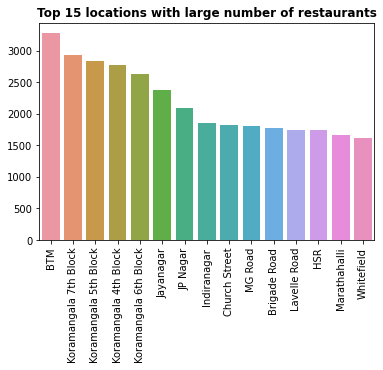

In [16]:

names = df['location'].value_counts()[:15].index
values = df['location'].value_counts()[:15].values
sns.barplot(names,values)
plt.title("Top 15 locations with large number of restaurants", weight = 'bold')
plt.xticks(rotation=90)
plt.show()


In [17]:
names

Index(['BTM', 'Koramangala 7th Block', 'Koramangala 5th Block',
       'Koramangala 4th Block', 'Koramangala 6th Block', 'Jayanagar',
       'JP Nagar', 'Indiranagar', 'Church Street', 'MG Road', 'Brigade Road',
       'Lavelle Road', 'HSR', 'Marathahalli', 'Whitefield'],
      dtype='object')

In [18]:
values

array([3279, 2938, 2836, 2779, 2623, 2371, 2096, 1860, 1827, 1811, 1769,
       1744, 1741, 1659, 1620])

In [19]:
#Inference - Max number of restaurants in BTM

In [20]:
dishes_data = df[df.dish_liked.notnull()]
dishes_data.dish_liked = dishes_data.dish_liked.apply(lambda x:x.lower().strip())

In [21]:
dishes_data.dish_liked.isnull().sum()

0

In [22]:
dish_count = []
for i in dishes_data.dish_liked:
    for t in i.split(','):
        t = t.strip() 
        dish_count.append(t)


Text(0, 0.5, 'Count')

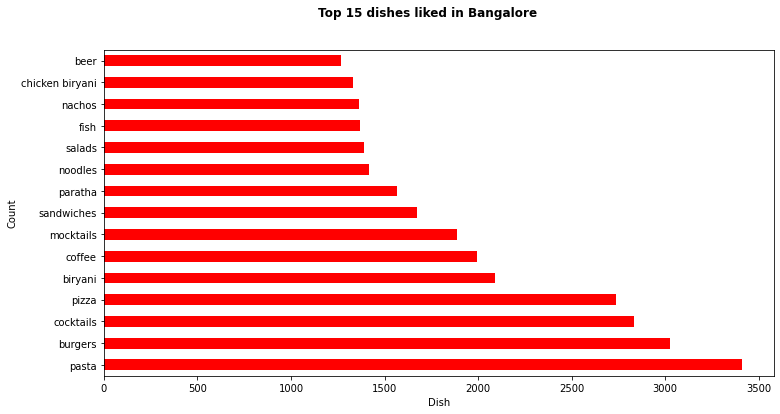

In [23]:
plt.figure(figsize=(12,6)) 
pd.Series(dish_count).value_counts()[:15].plot(kind='barh',color= 'r')
plt.suptitle('Top 15 dishes liked in Bangalore',fontweight='bold')
plt.xlabel('Dish')
plt.ylabel('Count')

In [24]:
#Inference - The most liked dish in Bangalore is Pasta 

In [25]:
df.online_order.value_counts()

Yes    30444
No     21273
Name: online_order, dtype: int64

In [26]:
#No null values

Text(0, 0.5, 'No. of restaurants')

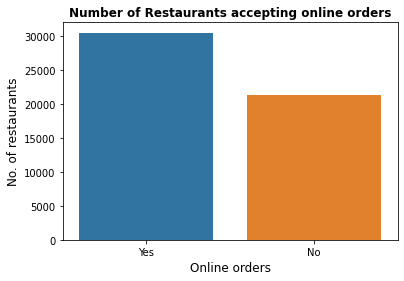

In [27]:
ax= sns.countplot(df['online_order'])
plt.title('Number of Restaurants accepting online orders', weight='bold')
plt.xlabel('Online orders',size = 12)
plt.ylabel('No. of restaurants',size = 12)

In [28]:
#Inference - Online order has no null values.
#Most of the orders are online i.e 30444

Text(0.5, 1.0, 'Average cost for 2 people in Rupees')

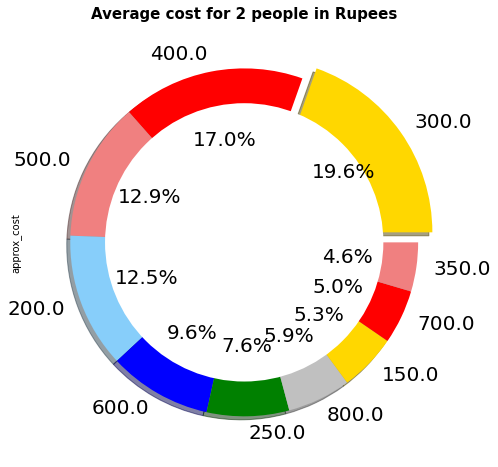

In [29]:
colors = ('gold', 'red', 'lightcoral', 'lightskyblue','blue','green','silver')
fig= plt.figure(figsize=(17, 8))
explode = (0.1, 0, 0, 0,0,0,0,0,0,0) 
delplot = df['approx_cost'].value_counts()[:10].plot(kind = 'pie',autopct='%1.1f%%',fontsize=20,shadow=True,explode = explode,colors = colors)
centre_circle = plt.Circle((0,0),0.80,fc='w')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Average cost for 2 people in Rupees",fontsize = 15,weight = 'bold')


Mean =  555.431566447994
Standard Deviation =  437.3802239757413
Median =  400.0
Mode =  0    300.0
dtype: float64


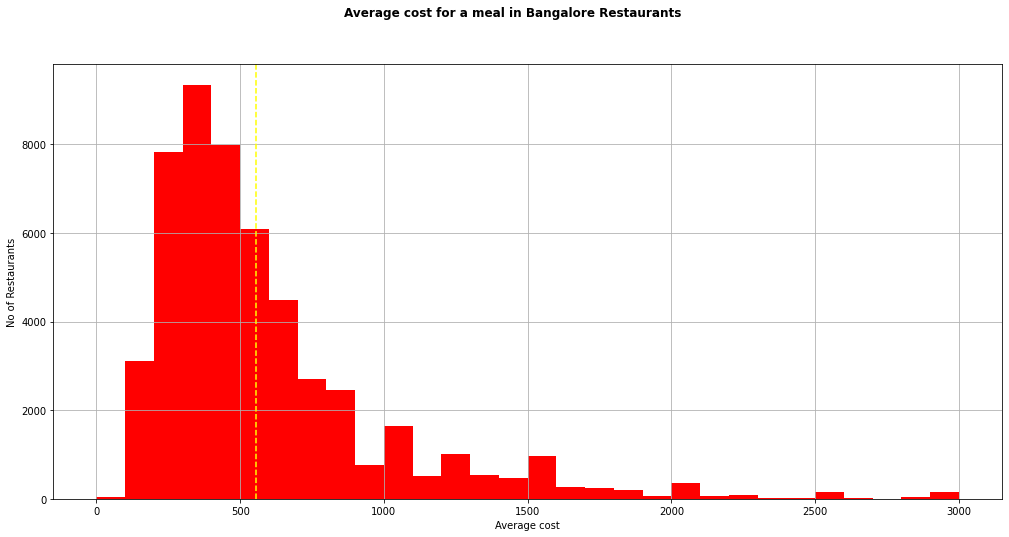

In [30]:
plt.figure(figsize=(17, 8))
df.approx_cost.astype(float).hist(color='r',range=(0,3000),bins=30)
plt.axvline(x= df.approx_cost.astype(float).mean(),ls='--',color='yellow')
plt.suptitle('Average cost for a meal in Bangalore Restaurants',fontweight='bold')
plt.xlabel('Average cost')
plt.ylabel('No of Restaurants')
print('Mean = ',df.approx_cost.astype(float).mean())
print('Standard Deviation = ',df.approx_cost.astype(float).std())
print('Median = ',df.approx_cost.astype(float).median())
print('Mode = ',df.approx_cost.astype(float).mode())
df['approx_cost']=df['approx_cost'].astype(float)


In [31]:
print(df.isna().sum())

name                0
online_order        0
book_table          0
rating          10052
votes               0
rest_type           0
dish_liked      28078
cuisines            0
approx_cost         0
listed_type         0
location            0
dtype: int64


In [32]:
df.dropna(how = 'any',inplace = True, subset = ['rating'])# remove rows without rating
df.isna().sum()

name                0
online_order        0
book_table          0
rating              0
votes               0
rest_type           0
dish_liked      18203
cuisines            0
approx_cost         0
listed_type         0
location            0
dtype: int64

Mean =  3.700448817952717
Median = 3.7
Mode = 3.7
Standard Deviation =  0.4405127669731406


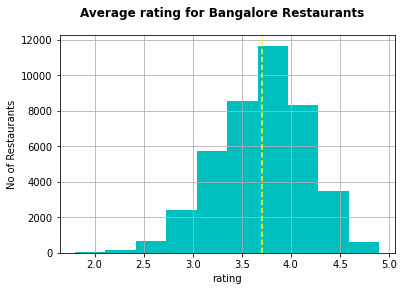

In [33]:
df.rating.hist(color='c')
plt.axvline(x= df.rating.mean(),ls='--',color='yellow')
plt.suptitle('Average rating for Bangalore Restaurants',fontweight='bold')
plt.xlabel('rating')
plt.ylabel('No of Restaurants')
print('Mean = ',df.rating.mean())
print('Median =',df.rating.median())
print('Mode =',df.rating.median())
print('Standard Deviation = ',df.rating.std())

Text(0.5, 1.0, 'rating vs Online order')

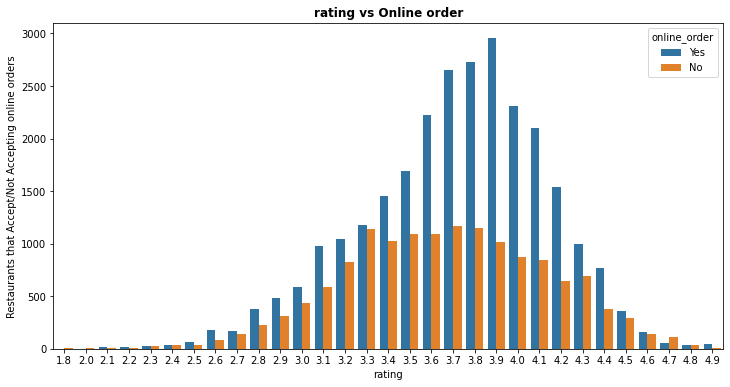

In [34]:
plt.figure(figsize = (12,6))
sns.countplot(x=df['rating'], hue = df['online_order'])
plt.ylabel("Restaurants that Accept/Not Accepting online orders")
plt.title("rating vs Online order",weight = 'bold')

In [35]:

print(df.isna().sum())
df.head()

name                0
online_order        0
book_table          0
rating              0
votes               0
rest_type           0
dish_liked      18203
cuisines            0
approx_cost         0
listed_type         0
location            0
dtype: int64


,name,online_order,book_table,rating,votes,rest_type,dish_liked,cuisines,approx_cost,listed_type,location
0,Jalsa,Yes,Yes,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet,Banashankari


# Normalization , standarizing

In [36]:
from sklearn import preprocessing
norma_data=df.copy()
le = preprocessing.LabelEncoder()
norma_data['rest_type'] = norma_data['rest_type'].str.replace(',' , '').astype(str).apply(lambda x: ' '.join(sorted(x.split())))
norma_data['cuisines'] = norma_data['cuisines'].str.replace(',' , '').astype(str).apply(lambda x: ' '.join(sorted(x.split()))) 
norma_data['dish_liked'] = norma_data['dish_liked'].str.replace(',' , '').astype(str).apply(lambda x: ' '.join(sorted(x.split()))) 
norma_data['location'] = norma_data['location'].astype(str)

In [37]:
norma_data['online_order']= pd.get_dummies(norma_data.online_order, drop_first=True)
norma_data['book_table']= pd.get_dummies(norma_data.book_table, drop_first=True)
norma_data['location'] = le.fit_transform(norma_data['location'])
norma_data['rest_type'] = le.fit_transform(norma_data['rest_type'])
norma_data['cuisines'] = le.fit_transform(norma_data['cuisines'])
norma_data['dish_liked'] = le.fit_transform(norma_data['dish_liked'])

norma_data.head()

,name,online_order,book_table,rating,votes,rest_type,dish_liked,cuisines,approx_cost,listed_type,location
0,Jalsa,1,1,4.1,775,38,1875,1255,800.0,Buffet,1
1,Spice Elephant,1,0,4.1,787,38,1709,1268,800.0,Buffet,1
2,San Churro Cafe,1,0,3.8,918,30,3542,1059,800.0,Buffet,1
3,Addhuri Udupi Bhojana,0,0,3.7,88,27,4535,1580,300.0,Buffet,1
4,Grand Village,0,0,3.8,166,38,4636,1622,600.0,Buffet,1


In [38]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
df1=norma_data
x1 = df1[['rating']].values.astype(float)
x1_scaled = scaler.fit_transform(x1)
df_normalized1 = pd.DataFrame(x1_scaled)

x2 = df1[['approx_cost']].values.astype(float)
x2_scaled = scaler.fit_transform(x2)
df_normalized2 = pd.DataFrame(x2_scaled)

x3 = df1[['votes']].values.astype(float)
x3_scaled = scaler.fit_transform(x3)
df_normalized3 = pd.DataFrame(x3_scaled)

Text(0, 0.5, '')

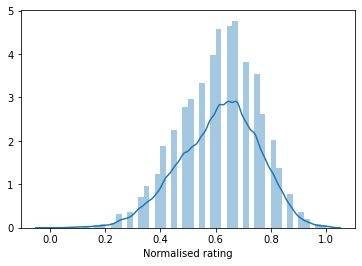

In [39]:
sns.distplot(df_normalized1[0])
plt.xlabel('Normalised rating')
plt.ylabel('')

In [40]:
num_values1=norma_data.select_dtypes(['float64','int64','int32']).columns
scaler = sk.preprocessing.StandardScaler()
scaler.fit(norma_data[num_values1])
norma_data[num_values1]=scaler.transform(norma_data[num_values1])

Text(0.5, 0, 'standerdised rating')

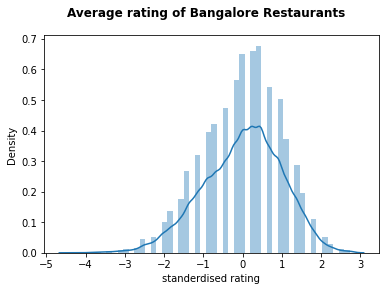

In [41]:
sns.distplot(norma_data.rating)
plt.suptitle('Average rating of Bangalore Restaurants',fontweight='bold')
plt.xlabel('standerdised rating')

# Hypothesis testing

In [42]:
import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats as stests
sample=df['rating'].sample(n=50)
print('Sample Mean: ',float(sample.mean()))
ztest ,pval = stests.ztest(sample, x2=None, value=3.75,alternative='smaller')
#value is the assumed mean value we take for H0
print('z Test Statistic:' ,ztest)
print("p value =",pval)

Sample Mean:  3.7039999999999997
z Test Statistic: -0.8216424795521544
p value = 0.20564020253519522


#### We claim that the minimum average rating of restaurants in Bangalore is 3.75 with a standard deviation of 1.1. To verify this hypothesis, a sample of 50 restaurants is chosen at random. The sample mean is as calculated above. Is there sufficient evidence in the sample to indicate, at a 5% significance level, that the assumption is true?

Here, H0: μ >= 3.75
      Ha: μ < 3.75  @ α = 0.05

The sample is large(>30) and the sample standard deviation is known. Thus the test statistic can be calculated as:

This is a one-tailed test. To be more specific, it's a left tailed test. So there a single critical value -zα = -z(0.005)
which is equal to -1.645. Thus, the rejection rejection is (-int,-1.645]

The test statistic does not fall in the rejection region
Decision : Fail to Reject Ho
In the context of our problem our conclusion is:
###### Conclusion - The averge rating of restaurants Bangalore is not less than 3.75

# Corelations

In [43]:
df['online_order']= pd.get_dummies(df.online_order, drop_first=True)
df['book_table']= pd.get_dummies(df.book_table, drop_first=True)

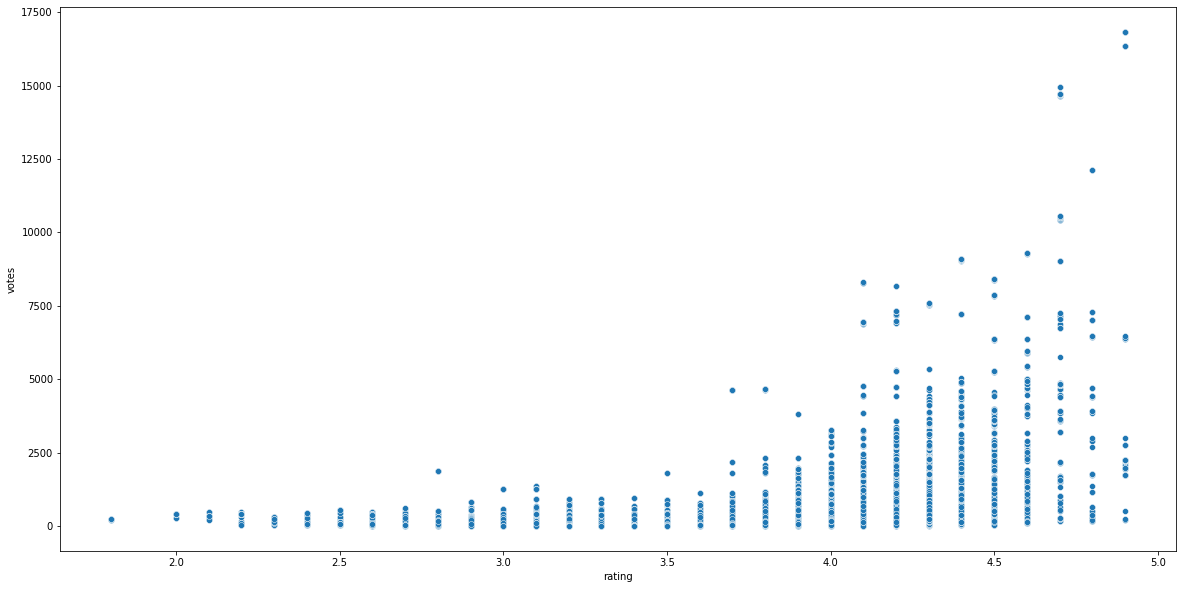

In [44]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='rating',y='votes',data=df)
plt.show()

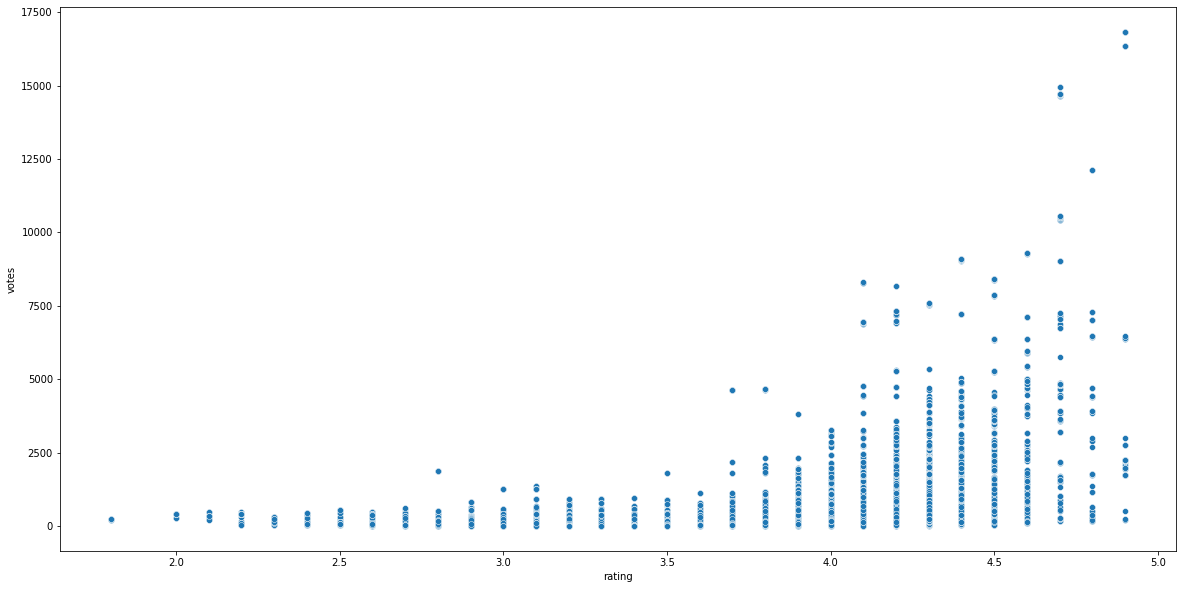

In [45]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='rating',y='votes',data=df)
plt.show()

,online_order,book_table,rating,votes,approx_cost
online_order,1.000000,-0.050980,0.068479,-0.013105,-0.173684
book_table,-0.050980,1.000000,0.424631,0.392491,0.614251
rating,0.068479,0.424631,1.000000,0.434040,0.384113
votes,-0.013105,0.392491,0.434040,1.000000,0.365981
approx_cost,-0.173684,0.614251,0.384113,0.365981,1.000000


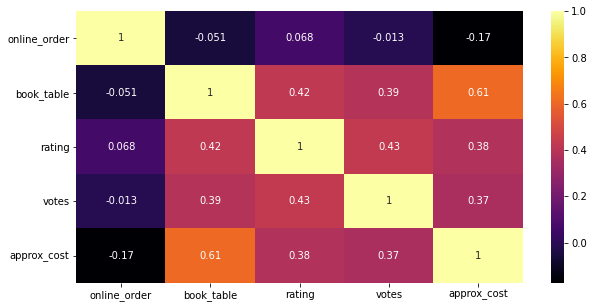

In [46]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="inferno",annot=True)
c

# Data modeling

In [47]:
#Inference - come up with inference
df.shape

(41665, 11)

In [48]:
#standarizing



In [49]:
data = dataframe.copy()
data.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [50]:
data['online_order']= pd.get_dummies(data.online_order, drop_first=True)
data['book_table']= pd.get_dummies(data.book_table, drop_first=True)
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [51]:
data.drop(columns =['dish_liked','reviews_list','menu_item','listed_in(type)'], inplace = True)

In [52]:
data['rest_type'] = data['rest_type'].str.replace(',' , '').astype(str).apply(lambda x: ' '.join(sorted(x.split())))
data['rest_type'].value_counts().head()

Bites Quick       19132
Casual Dining     10330
Cafe               3732
Delivery           2604
Dessert Parlor     2263
Name: rest_type, dtype: int64

In [53]:
data['cuisines'] = data['cuisines'].str.replace(',' , '').astype(str).apply(lambda x: ' '.join(sorted(x.split()))) 
data['cuisines'].value_counts().head()

Indian North                         2913
Chinese Indian North                 2800
Indian South                         1828
Chinese Indian Indian North South    1478
Bakery Desserts                      1114
Name: cuisines, dtype: int64

In [54]:
data['location'] = data['location'].astype(str)




May be we can add ffew more graphs here




In [55]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data['location'] = le.fit_transform(data['location'])
data['rest_type'] = le.fit_transform(data['rest_type'])
data['cuisines'] = le.fit_transform(data['cuisines'])

In [56]:
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].str.replace(',','').astype('float')
data.tail()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost(for two people),listed_in(city)
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,0,0,3.6 /5,27,080 40301477,89,8,1493,1500.0,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,0,0,NaN,0,+91 8197675843,89,8,1707,600.0,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,0,0,NaN,0,NaN,89,8,1707,2000.0,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,0,1,4.3 /5,236,080 49652769,26,8,1707,2500.0,Whitefield
51716,https://www.zomato.com/bangalore/the-nest-the-...,"ITPL Main Road, KIADB Export Promotion Industr...",The Nest - The Den Bengaluru,0,0,3.4 /5,13,+91 8071117272,26,11,1524,1500.0,Whitefield


In [57]:
data.drop(columns =['url','address','phone','listed_in(city)'], inplace = True)
data.rename(columns={'approx_cost(for two people)': 'average_cost','rate':'rating'}, inplace=True)
data['rating'] = data.loc[:,'rating'].replace('[ ]','',regex = True)
data['rating'] = data['rating'].replace('',np.NaN)
data['rating'] = data['rating'].replace('NEW',np.NaN)
data['rating'] = data['rating'].replace('-',np.NaN)
data.dropna(how = 'any', inplace = True)
data['rating'] = data['rating'].astype(str)
data['rating'] = data['rating'].apply(lambda r: r.replace('/5',''))
data['rating'] = data['rating'].apply(lambda r: float(r))
data

,name,online_order,book_table,rating,votes,location,rest_type,cuisines,average_cost
0,Jalsa,1,1,4.1,775,1,40,1421,800.0
1,Spice Elephant,1,0,4.1,787,1,40,1434,800.0
2,San Churro Cafe,1,0,3.8,918,1,32,1204,800.0
3,Addhuri Udupi Bhojana,0,0,3.7,88,1,29,1791,300.0
4,Grand Village,0,0,3.8,166,4,40,1837,600.0
...,...,...,...,...,...,...,...,...,...
51709,The Farm House Bar n Grill,0,0,3.7,34,89,11,1556,800.0
51711,Bhagini,0,0,2.5,81,89,11,200,800.0
51712,Best Brews - Four Points by Sheraton Bengaluru...,0,0,3.6,27,89,8,1493,1500.0
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,0,1,4.3,236,26,8,1707,2500.0


In [58]:
x = data.drop(['rating','name'],axis = 1)

In [59]:
y = data['rating']

In [60]:
from sklearn import model_selection
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(x,y,test_size = 0.3,random_state = 33)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41418 entries, 0 to 51716
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          41418 non-null  object 
 1   online_order  41418 non-null  uint8  
 2   book_table    41418 non-null  uint8  
 3   rating        41418 non-null  float64
 4   votes         41418 non-null  int64  
 5   location      41418 non-null  int64  
 6   rest_type     41418 non-null  int64  
 7   cuisines      41418 non-null  int64  
 8   average_cost  41418 non-null  float64
dtypes: float64(2), int64(4), object(1), uint8(2)
memory usage: 2.6+ MB


In [61]:
#MODELS

In [62]:
#LR
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(X_train,Y_train)
y_pred_lr = lr.predict(X_test)

#determining accuracy of prediction
lr.score(X_test, Y_test)*100


29.41521392728469

In [63]:
#Random Forest
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,Y_train)
y_pred_rfr = rfr.predict(X_test)

rfr.score(X_test,Y_test)*100

92.44064126997753

In [64]:
onehot = pd.read_csv("/content/gdrive/My Drive/zomato.csv")
onehot.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [65]:
onehot.rename(columns={'rate':'rating'},inplace=True)
onehot['rating'] = onehot['rating'].replace('NEW',np.NaN)
onehot['rating'] = onehot['rating'].replace('-',np.NaN)
onehot.dropna(how = 'any', inplace = True)

onehot['rating'] = onehot.loc[:,'rating'].replace('[ ]','',regex = True)
onehot['rating'] = onehot['rating'].astype(str)
onehot['rating'] = onehot['rating'].apply(lambda r: r.replace('/5',''))
onehot['rating'] = onehot['rating'].apply(lambda r: float(r))

In [66]:
onehot['cuisines'] = onehot['cuisines'].str.replace(',' , '') 
onehot['cuisines'] = onehot['cuisines'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
onehot['cuisines'].unique()


array(['Chinese Indian Mughlai North', 'Chinese Indian North Thai',
       'Cafe Italian Mexican', ...,
       'BBQ Continental Indian Italian North', 'Nepalese Tibetan',
       'Andhra Biryani Hyderabadi'], dtype=object)

In [67]:
onehot['rest_type'] = onehot['rest_type'].str.replace(',' , '') 
onehot['rest_type'] = onehot['rest_type'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
onehot['rest_type'].value_counts().head()

Casual Dining        7298
Bites Quick          5224
Cafe                 2321
Bar Casual Dining    1308
Dessert Parlor       1074
Name: rest_type, dtype: int64

In [68]:
onehot['dish_liked'] = onehot['dish_liked'].str.replace(',' , '') 
onehot['dish_liked'] = onehot['dish_liked'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
onehot['dish_liked'].value_counts().head()

Biryani            179
Friendly Staff      68
Waffles             67
Biryani Chicken     66
Dosa Masala         56
Name: dish_liked, dtype: int64

In [69]:
dummy_rest_type=pd.get_dummies(onehot['rest_type'])
dummy_city=pd.get_dummies(onehot['location'])
dummy_cuisines=pd.get_dummies(onehot['cuisines'])
dummy_dishliked=pd.get_dummies(onehot['dish_liked'])

In [70]:
final=pd.concat([onehot,dummy_rest_type,dummy_city,dummy_cuisines,dummy_dishliked],axis=1)


In [71]:
final

,url,address,name,online_order,book_table,rating,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Bakery,Bakery Bites Quick,Bakery Cafe,Bakery Dessert Parlor,Bar,Bar Bites Quick,Bar Cafe,Bar Casual Dining,Bar Dining Fine,Bar Lounge,Bar Microbrewery,Bar Pub,Beverage Bites Quick Shop,Beverage Cafe Shop,Beverage Dessert Parlor Shop,Beverage Shop,Bites Cafe Quick,Bites Court Food Quick,Bites Dessert Parlor Quick,Bites Quick,Bites Quick Shop Sweet,Cafe,Cafe Casual Dining,...,Pizza,Pizza Sandwich Supreme,Pizza Shakes Thick,Pizza Waffles,Pizza Wings,Platter Veg,Pongal,Pool Table,Prawns Wasabi,Prompt Service,Raita,Rasgulla Samosa,Rice Roti,Roll Swiss,Rolls,Rolls Shawarma,Roti,Saag Thali Veg,Salad,Salad Salads Sandwiches,Salad Sandwich,Salad Sandwich Veg,Salad Thali Veg,Salads,Salmon,Samosa,Samosa Tea,Sandwich,Sandwich Sandwiches,Sandwiches Shawarma,Sandwiches Tea,Shakes Thick,Shawarma,Tea,Thali,Thali Veg,Tikka,Vada,Vegetarian,Waffles
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,Biryani Buffet Corn Dum Lajawab Lunch Masala P...,Chinese Indian Mughlai North,800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,Biryani Biryani Buffet Chicken Chocolate Curry...,Chinese Indian North Thai,800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,Cafe Casual Dining,Cannelloni Chocolate Churros Hot Minestrone Pa...,Cafe Italian Mexican,800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Bites Quick,Dosa Masala,Indian Indian North South,300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,Gappe Gol Panipuri,Indian North Rajasthani,600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51705,https://www.zomato.com/bangalore/izakaya-gastr...,"2nd Floor, Iona, Virginia Mall, Whitefield Mai...",Izakaya Gastro Pub,Yes,Yes,3.8,128,+91 7625087121\n+91 8050587483,Whitefield,Bar Casual Dining,Beer Chicken Cocktails Fish Gulab Guntur Jamun...,Continental Indian Mediterranean North,"1,200","[('Rated 3.0', ""RATED\n Nice place to hangout...",[],Pubs and bars,Whitefield,0,0,0,0

In [72]:
final.drop(columns=['rest_type','location','cuisines','dish_liked','name','phone'] , inplace=True)
final.drop(columns=['reviews_list','menu_item','listed_in(type)','listed_in(city)'], inplace=True)
final.drop(columns=['url','address'], inplace=True)

In [73]:
final['online_order']=pd.get_dummies(final['online_order'])
final['book_table']=pd.get_dummies(final['book_table'])
final


,online_order,book_table,rating,votes,approx_cost(for two people),Bakery,Bakery Bites Quick,Bakery Cafe,Bakery Dessert Parlor,Bar,Bar Bites Quick,Bar Cafe,Bar Casual Dining,Bar Dining Fine,Bar Lounge,Bar Microbrewery,Bar Pub,Beverage Bites Quick Shop,Beverage Cafe Shop,Beverage Dessert Parlor Shop,Beverage Shop,Bites Cafe Quick,Bites Court Food Quick,Bites Dessert Parlor Quick,Bites Quick,Bites Quick Shop Sweet,Cafe,Cafe Casual Dining,Cafe Dessert Parlor,Cafe Lounge,Cafe Pub,Cafee Casual Dining Irani,Casual Club Dining,Casual Court Dining Food,Casual Dining,Casual Dining Lounge,Casual Dining Microbrewery,Casual Dining Pub,Club,Court Food,...,Pizza,Pizza Sandwich Supreme,Pizza Shakes Thick,Pizza Waffles,Pizza Wings,Platter Veg,Pongal,Pool Table,Prawns Wasabi,Prompt Service,Raita,Rasgulla Samosa,Rice Roti,Roll Swiss,Rolls,Rolls Shawarma,Roti,Saag Thali Veg,Salad,Salad Salads Sandwiches,Salad Sandwich,Salad Sandwich Veg,Salad Thali Veg,Salads,Salmon,Samosa,Samosa Tea,Sandwich,Sandwich Sandwiches,Sandwiches Shawarma,Sandwiches Tea,Shakes Thick,Shawarma,Tea,Thali,Thali Veg,Tikka,Vada,Vegetarian,Waffles
0,0,0,4.1,775,800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,4.1,787,800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,3.8,918,800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,3.7,88,300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,3.8,166,600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51705,0,0,3.8,128,"1,200",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
51707,1,1,3.9,77,"2,000",0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
51708,1,1,2.8,161,"1,200",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
51711,1,1,2.5,81,800,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [74]:
final['approx_cost(for two people)'] = final['approx_cost(for two people)'].str.replace(',' , '')
x = final.drop(['rating'],axis=1)
y = final['rating']

In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = sk.model_selection.train_test_split(x,y,test_size = 0.3,random_state = 33)

In [76]:
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
rfr = sk.ensemble.RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)

rfr.score(X_test,y_test)*100

91.62931971195401